In [6]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [ ]:
GOOGLE_API_KEY=os.getenv("GOOGLE_API_KEY")

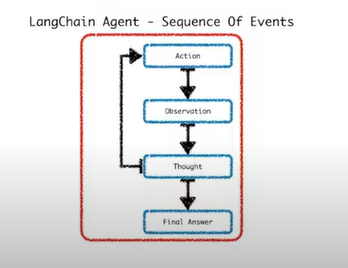

In [8]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_google_genai import ChatGoogleGenerativeAI

embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")


d:\KnowBase\LANGGRAPH-END-TO-END\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DefaultCredentialsError: Your default credentials were not found. To set up Application Default Credentials, see https://cloud.google.com/docs/authentication/external/set-up-adc for more information.